# lab 4

## import libs and connect db

In [68]:
!pip install psycopg2

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [69]:
import pandas
import configparser
import psycopg2

In [70]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['my aws']['host']
db = config['my aws']['db']
user = config['my aws']['user']
password = config['my aws']['password']




In [78]:
conn = psycopg2.connect(

                        host=host,
                        user=user,
                        password=password,
                        database=db
                        )

print(user)

gp13


In [80]:
cur=conn.cursor()

#  Q1

In [81]:
sql_q1 = """
         select * from gp13.student
         """

In [82]:
df=pandas.read_sql_query(sql_q1,conn) 
df[:]

,s_email,s_name,major
0,slatekm@dukes.jmu.edu,Kali Slate,IA
1,ackermss@dukes.jmu.edu,Sasha Ackerman,IA
2,larouncj@dukes.jmu.edu,Chris Larounis,IA
3,thomp6ce@dukes.jmu.edu,Chloe Thompson,IA


## Q2

In [108]:
sql_q2= """
        select gp13.professor.p_name,
        gp13.course.course_name
        from gp13.professor
        inner join gp13.course
        on gp13.professor.p_email = gp13.course.p_email
        
        """

In [109]:
df=pandas.read_sql_query(sql_q2, conn) 
df[:]

,p_name,course_name
0,Noel Hendrickson,Counterfactual Reasoning
1,Stephen Marrin,Introduction to Intelligence Analysis
2,Timothy Walton,Introduction to National Security Intelligence
3,Timothy Walton,Hypothesis Testing
4,new_p,Data Mining
5,Duke Dog,new


# Q3

In [111]:
sql_q3= """
        select course_number, 
        count(course_number) as enrolled
        from gp13.enroll_list
        group by course_number
        order by enrolled desc
        """
        

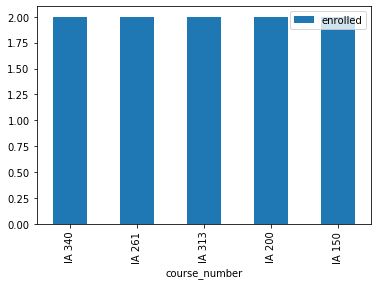

In [112]:
df=pandas.read_sql_query(sql_q3, conn) 
df.plot.bar(y='enrolled',x='course_number')

# Q4

In [115]:
sql_q4= """
        select gp13.professor.p_name,
        count(gp13.course.course_name) as teaching_number
        from gp13.professor
        inner join gp13.course
        on gp13.professor.p_email = gp13.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

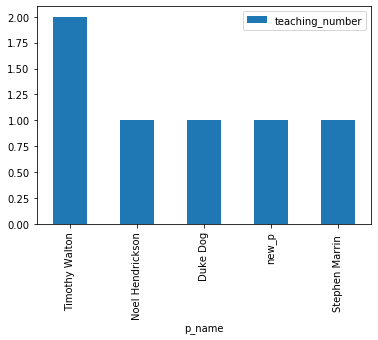

In [117]:
df=pandas.read_sql_query(sql_q4, conn) 
df.plot.bar(y='teaching_number',x='p_name')

# Q5

In [138]:
sql_q5_professor= """
                insert into gp13.professor(p_email,p_name, office)
                values('{}','{}','{}')
                """ .format('new@jmu.edu','new','new_office')

In [139]:
conn.commit()

In [141]:
df=pandas.read_sql_query('select * from gp13.professor',conn)
df[:]

,p_email,p_name,office_number
0,marrinsp@jmu.edu,Stephen Marrin,ENGEO 2104
1,waltontr@jmu.edu,Timothy Walton,ISAT 326
2,hendrinx@jmu.edu\n,Noel Hendrickson,None
3,new_p@jmu.edu,new_p,new_office
4,dukenew@jmu.edu,Duke Dog,None
5,new@jmu.edu,new,new_o


In [142]:
sql_q5_course= """
                insert into gp13.course(course_number,course_name,room,p_email)
                values('{}','{}','{}','{}')
                """ .format('ia_new','new_c_name','new_room','new@jmu.edu')

In [143]:
cur.execute(sql_q5_course)

In [144]:
df=pandas.read_sql_query('select * from gp13.course',conn)
df[:]

,course_number,course_name,room,p_email
0,IA 313,Counterfactual Reasoning,Online,hendrinx@jmu.edu\n
1,IA 150,Introduction to Intelligence Analysis,Online,marrinsp@jmu.edu
2,IA 200,Introduction to National Security Intelligence,Online,waltontr@jmu.edu
3,IA 261,Hypothesis Testing,Online,waltontr@jmu.edu
4,IA 340,Data Mining,Online,new_p@jmu.edu
5,000,new,online,dukenew@jmu.edu
6,ia_new,new_c_name,new_room,new@jmu.edu


# Q6

In [145]:
sql_q6_course = """
                update gp13.course
                set p_email = '{}'
                where p_email ='{}'
                """.format('new@jmu.edu','waltontr@jmu.edu')

In [146]:
cur.execute(sql_q6_course)

In [147]:
conn.commit()

In [148]:
df=pandas.read_sql_query('select * from gp13.course',conn)
df[:]

,course_number,course_name,room,p_email
0,IA 313,Counterfactual Reasoning,Online,hendrinx@jmu.edu\n
1,IA 150,Introduction to Intelligence Analysis,Online,marrinsp@jmu.edu
2,IA 340,Data Mining,Online,new_p@jmu.edu
3,000,new,online,dukenew@jmu.edu
4,ia_new,new_c_name,new_room,new@jmu.edu
5,IA 200,Introduction to National Security Intelligence,Online,new@jmu.edu
6,IA 261,Hypothesis Testing,Online,new@jmu.edu


In [151]:
sql_q6_professor= """
                    delete from gp13.professor
                    where p_email ='{}'
                    """.format('waltontr@jmu.edu')

In [152]:
cur.execute(sql_q6_professor)

In [153]:
df=pandas.read_sql_query('select * from gp13.course',conn)
df[:]

,course_number,course_name,room,p_email
0,IA 313,Counterfactual Reasoning,Online,hendrinx@jmu.edu\n
1,IA 150,Introduction to Intelligence Analysis,Online,marrinsp@jmu.edu
2,IA 340,Data Mining,Online,new_p@jmu.edu
3,000,new,online,dukenew@jmu.edu
4,ia_new,new_c_name,new_room,new@jmu.edu
5,IA 200,Introduction to National Security Intelligence,Online,new@jmu.edu
6,IA 261,Hypothesis Testing,Online,new@jmu.edu


# close connection

In [154]:
cur.close()
conn.close()